In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.decomposition import PCA

In [25]:
def plot_cumulative_variance(pca):
    P = []
    for p in pca.explained_variance_ratio_:
        if len(P)==0:
            P.append(p)
        else:
            P.append(P[-1]+p)
    plt.plot(P)
    plt.show()
    return P

def get_transformed_data():
    df = pd.read_csv("train.csv")
    data = df.as_matrix().astype(np.float32)
    np.random.shuffle(data)
    
    X = data[:,1:]
    y = data[:,0].astype(np.int32)
    
    pca = PCA()
    mu = X.mean(axis=0)
    X = X - mu
    Z = pca.fit_transform(X)
    
    print(Z.shape)
    plot_cumulative_variance(pca)
    
    return Z, y, pca, mu

SyntaxError: invalid syntax (<ipython-input-14-a78f3defd7d0>, line 2)

(42000L, 784L)


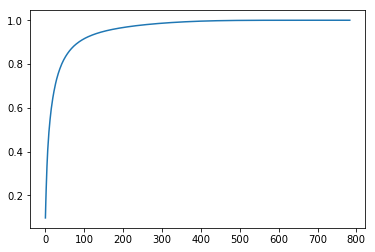

In [45]:
X, y, pca, mu = get_transformed_data()

In [46]:
X = X[:,300]

In [47]:
mu = X.mean(axis=0)
std = X.std(axis=0)

In [48]:
X = (X-mu)/std


In [49]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [52]:
enc = OneHotEncoder(sparse=False,categorical_features=[0])
y_train = enc.fit_transform(y_train.reshape(-1,1))
y_test = enc.fit_transform(y_test.reshape(-1,1))

In [57]:
def softmax(Z):
    return exp(Z)/np.sum(exp(Z),axis=1)

def forward(X,W,b):
    Z = X.dot(W)+b
    return softmax(Z)

In [56]:
N,D = X_train.shape

W = np.random.randn(D,10)
b = np.zeros(10)
ll = []
for i in xrange(200):
    Z_train = forward(X_train,W,b)
    Z_test = forward(X_test,W,b)
    
    W += alpha*X_train.T.dot(Y_train-Z_train) - reg*W
    b += alpha*(Y_train-Z_train).sum(axis=1)
    
    ll.append(cost(Z_test,y_test))
    
    if i%10==0:
        print "Cost at iteration: ",i," is ",ll
        print "Error Accuracy",test_accuracy(Z_test,y_test)
    

(31500L, 10L)

In [ ]:
str.endswith("c")

In [ ]:
str = "abc"
if (~(1!=1))~
    print "asd"
print "asd"

In [ ]:
"aa".count("a")